In [7]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model


# Let's insert our data

In [9]:
file = './allegations_202007271729.csv'
df = pd.read_csv(file)
df.head(5)

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


# Let's collect our 2 datasets: (1) White male and (2) Black male

In [12]:
tempdf = df[df.complainant_gender == 'Male']
tempdf.head(5)
blackdf_male = tempdf[tempdf.complainant_ethnicity == 'Black']
blackdf_male.head(5)

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
12,10026,Brian,Alexander,079 DET,3185,35092,5,2016,10,2016,...,30,Black,Male,30.0,Abuse of Authority,Search (of person),79.0,Moving violation,No arrest made or summons issued,Unsubstantiated
13,10026,Brian,Alexander,079 DET,3185,26353,8,2012,2,2014,...,27,Black,Male,35.0,Force,Pepper spray,79.0,PD suspected C/V of violation/crime - street,Arrest - OGA,Unsubstantiated


In [13]:

whitedf_male = tempdf[tempdf.complainant_ethnicity == 'White']
whitedf_male.head(5)

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
5,10012,Paula,Smith,078 PCT,4021,37256,5,2017,10,2017,...,50,White,Male,31.0,Abuse of Authority,Refusal to process civilian complaint,78.0,C/V telephoned PCT,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
6,10014,Malachy,Sullivan,078 PCT,4143,33969,11,2015,2,2016,...,43,White,Male,34.0,Offensive Language,Sexual orientation,78.0,PD suspected C/V of violation/crime - street,Summons - other violation/crime,Substantiated (Formalized Training)
99,10042,John,Musante,079 DET,15,10247,11,2005,5,2006,...,24,White,Male,29.0,Abuse of Authority,Retaliatory arrest,25.0,Other,Arrest - other violation/crime,Exonerated
114,10042,John,Musante,079 DET,15,33550,9,2015,2,2016,...,34,White,Male,27.0,Abuse of Authority,Stop,83.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Exonerated
116,10042,John,Musante,079 DET,15,33550,9,2015,2,2016,...,34,White,Male,27.0,Abuse of Authority,Frisk,83.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Exonerated


# Converting Categorical Variables using the one-hot encoding method
###### Explanation of one-hot encoding for converting categorical variables

Encoding method is required because it is challenging for algorithms to understand categorical data. The reason why I use one-hot encoding method is because categorical variables needs to be converted into numerical values since scikit-learn only takes numerical values as input in a numpy array. These binary values express the relationship between grouped and encoded column. One-hot encoding changes the categorical data to a numerical format and groups categorical data without losing any information.

Justification for using dummy variables during encoding method:

We could represent categorical values using numbers, but this encoding implies an ordered relationship between the values in the category. As shown in lecture material, to avoid this, I will encode categorical values using dummy variables.

The four categorical features we have are Q2 (gender), Q4 (education level), Q5 (most recent job title), and Q6 (Size of the company). I will convert these via onehotencoding where each category for each feature becomes a new column. A category's column will get a value of 1 if the original feature belonged to that category. Only one of the categorical feature columns can have of 1.

In [58]:
#The first row gets dropped because the interview question for each column comprises this row so it is not needed as an actual data point



dummies_white_allegation_train = pd.get_dummies(whitedf_male['allegation'], prefix='allegation')

dummies_black_allegation_train = pd.get_dummies(blackdf_male['allegation'], prefix='allegation')


dummies_white_allegation_train.head(5)
dummies_black_allegation_train.head(5)

,allegation_Action,allegation_Animal,allegation_Body Cavity Searches,allegation_Chokehold,allegation_Demeanor/tone,allegation_Electronic device information deletion,allegation_Entry of Premises,allegation_Ethnicity,allegation_Failure to provide RTKA card,allegation_Flashlight as club,...,allegation_Strip-searched,allegation_Threat of arrest,allegation_Threat of force (verbal or physical),allegation_Threat of summons,allegation_Threat re: removal to hospital,allegation_Threat to damage/seize property,allegation_Vehicle,allegation_Vehicle search,allegation_Vehicle stop,allegation_Word
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
age = whitedf_male['complainant_age_incident']

# Add the new features to the dataframe via concating
trainDF_white = pd.concat([whitedf_male.dropna()['complainant_age_incident'], dummies_white_allegation_train.dropna()['allegation_Vehicle search']], axis=1)
trainDF_black = pd.concat([blackdf_male.dropna()['complainant_age_incident'], dummies_black_allegation_train.dropna()['allegation_Vehicle search']], axis=1)

# Drop the original categorical feature columns

#trainDF = tempDF.drop(['allegation'],axis=1)

trainDF_white.head()

trainDF_black.head()


,complainant_age_incident,allegation_Vehicle search
1,26.0,0
2,26.0,0
3,45.0,0
12,30.0,0
13,35.0,0


#### First let's look at White Males

In [80]:
trainDF_white = trainDF_white[trainDF_white['complainant_age_incident'].notna()]
trainDF_white[:50]

,complainant_age_incident,allegation_Vehicle search
5,31.0,0
6,34.0,0
99,29.0,0
114,27.0,0
116,27.0,0
180,24.0,0
229,49.0,1
294,24.0,0
334,30.0,0
352,15.0,0


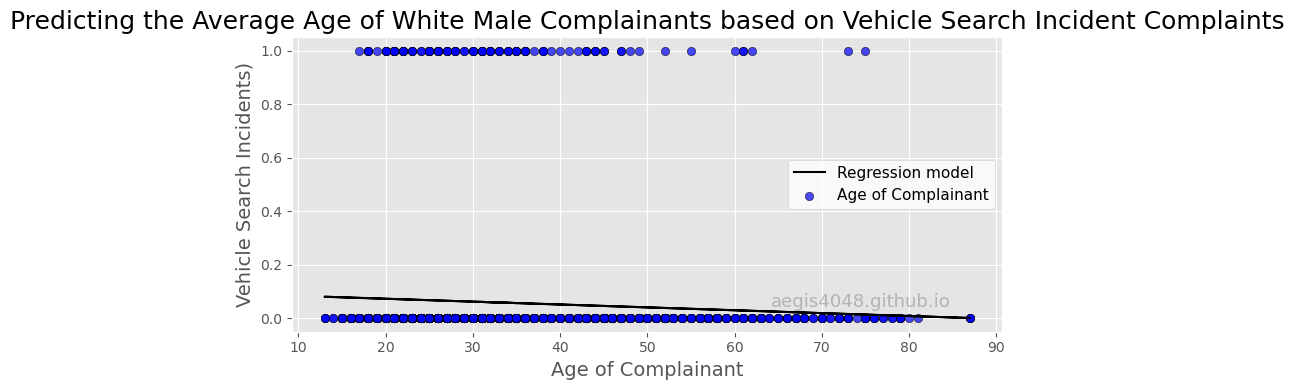

In [81]:
X = trainDF_white['complainant_age_incident'].values.reshape(-1,1)
y = trainDF_white['allegation_Vehicle search'].values.reshape(-1,1)
################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

############################################## Evaluate ############################################

r2 = model.score(X, y)

############################################## Plot ################################################

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='blue', alpha=0.7, label='Age of Complainant')
ax.set_ylabel('Vehicle Search Incidents)', fontsize=14)
ax.set_xlabel('Age of Complainant', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('Predicting the Average Age of White Male Complainants based on Vehicle Search Incident Complaints' % r2, fontsize=18)

fig.tight_layout()

#### First let's look at Black Males

In [77]:
trainDF_black = trainDF_black[trainDF_black['complainant_age_incident'].notna()]
trainDF_black[:50]

,complainant_age_incident,allegation_Vehicle search
1,26.0,0
2,26.0,0
3,45.0,0
12,30.0,0
13,35.0,0
16,46.0,0
17,34.0,0
19,23.0,0
26,35.0,0
27,30.0,0


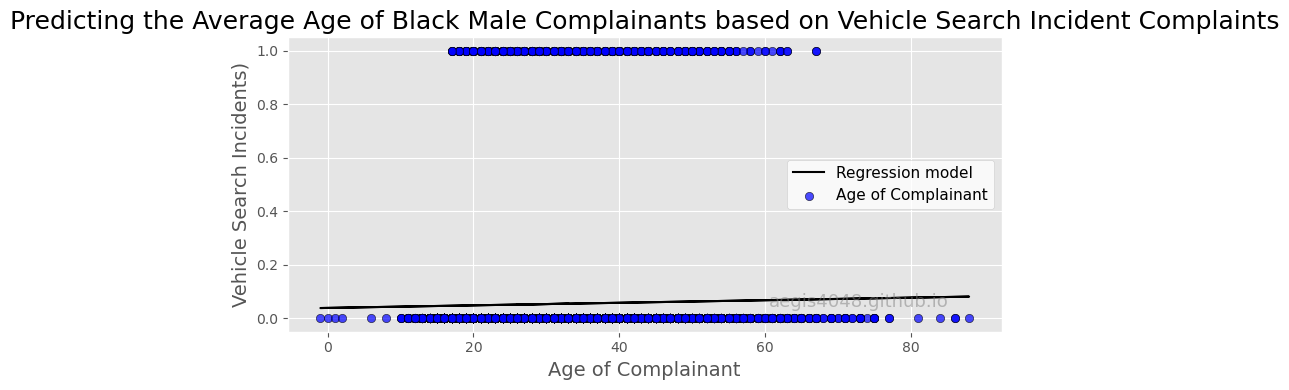

In [79]:
X = trainDF_black['complainant_age_incident'].values.reshape(-1,1)
y = trainDF_black['allegation_Vehicle search'].values.reshape(-1,1)
################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

############################################## Evaluate ############################################

r2 = model.score(X, y)

############################################## Plot ################################################

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='blue', alpha=0.7, label='Age of Complainant')
ax.set_ylabel('Vehicle Search Incidents)', fontsize=14)
ax.set_xlabel('Age of Complainant', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('Predicting the Average Age of Black Male Complainants based on Vehicle Search Incident Complaints' % r2, fontsize=18)

fig.tight_layout()

## Possible Inferences and Research Questions?
Using our Linear Regression Model, it appears as though the older the age of complainant among Black Males, the higher the chance for Vehicle Search Incident Complaints to occur. In comparison, the younger the complainaint among White Males, the higher the chance for Vehicle Search incident complaints to occur.

Could there be a reason for this difference? The model was trained on the same columns of the age of complainant and whether the individual made a Vehicle Search Incident Complaint. Why is there such a polar disparity between these two subgroups? In theory, the difference should not be so stark. Perhaps further research could be explored to further analyze and answer more questions about why such a disparity could exist.